In [1]:
import pandas as pd

# Load the processed datasets
X_train = pd.read_csv("X_train_processed.csv")
X_test = pd.read_csv("X_test_processed.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()  # Flatten to 1D array
y_test = pd.read_csv("y_test.csv").values.ravel()  # Flatten to 1D array

# Print dataset shapes to confirm loading
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (541540, 107)
X_test shape: (42778, 107)
y_train shape: (541540,)
y_test shape: (42778,)


train a Random Forest Classifier as our first model

**Why Random Forest?**

- Works well with structured data like X_train_processed.csv.
- Handles categorical and numerical features efficiently.
- Provides feature importance insights

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4]:
# Make predictions on test set
y_pred = model.predict(X_test)

In [6]:
from yellowbrick.classifier import ClassificationReport
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.metrics import accuracy_score, classification_report

In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.77


In [9]:
# Generate a full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         1.0       0.70      0.86      0.77      5754
         2.0       0.98      0.64      0.78      1840
         3.0       0.98      0.65      0.78      1733
         4.0       0.99      0.66      0.79      1325
         5.0       0.96      0.64      0.77      2130
         6.0       1.00      0.64      0.78      1681
         7.0       0.97      0.63      0.77      2494
         8.0       0.85      0.65      0.74      4982
         9.0       0.79      0.70      0.74      7300
        10.0       0.69      0.93      0.79     13539

    accuracy                           0.77     42778
   macro avg       0.89      0.70      0.77     42778
weighted avg       0.80      0.77      0.77     42778



/Users/yanxia/.pyenv/versions/3.11.7/lib/python3.11/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(
/Users/yanxia/.pyenv/versions/3.11.7/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanxia/.pyenv/versions/3.11.7/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yanxia/.pyenv/versions/3.11.7/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: Undefine

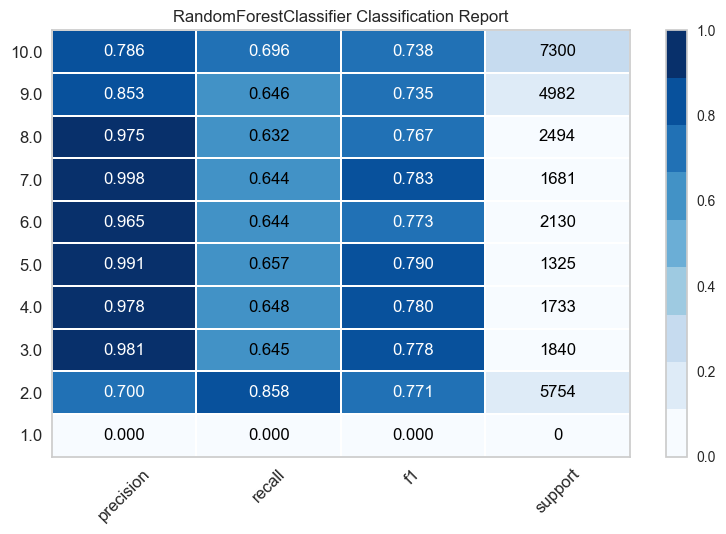

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [10]:
visualizer = ClassificationReport(model, support=True, cmap="Blues")
visualizer.score(X_test, y_test)  # Evaluate on test data
visualizer.show()

In [11]:
print("Unique values in y_train:", set(y_train))
print("Unique values in y_test:", set(y_test))


Unique values in y_train: {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}
Unique values in y_test: {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0}
